# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt 

df_user =  pd.read_csv('User_Data.csv')

# Display the DataFrame
print(df_user.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [10]:
df_user.Purchased.unique()

array([0, 1], dtype=int64)

In [2]:
# Importing the dataset  
X = df_user.iloc[:, [2, 3]].values  
y = df_user.iloc[:, 4].values  

In [9]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [3]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [5]:
#Fitting Decision Tree classifier to the training set  

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

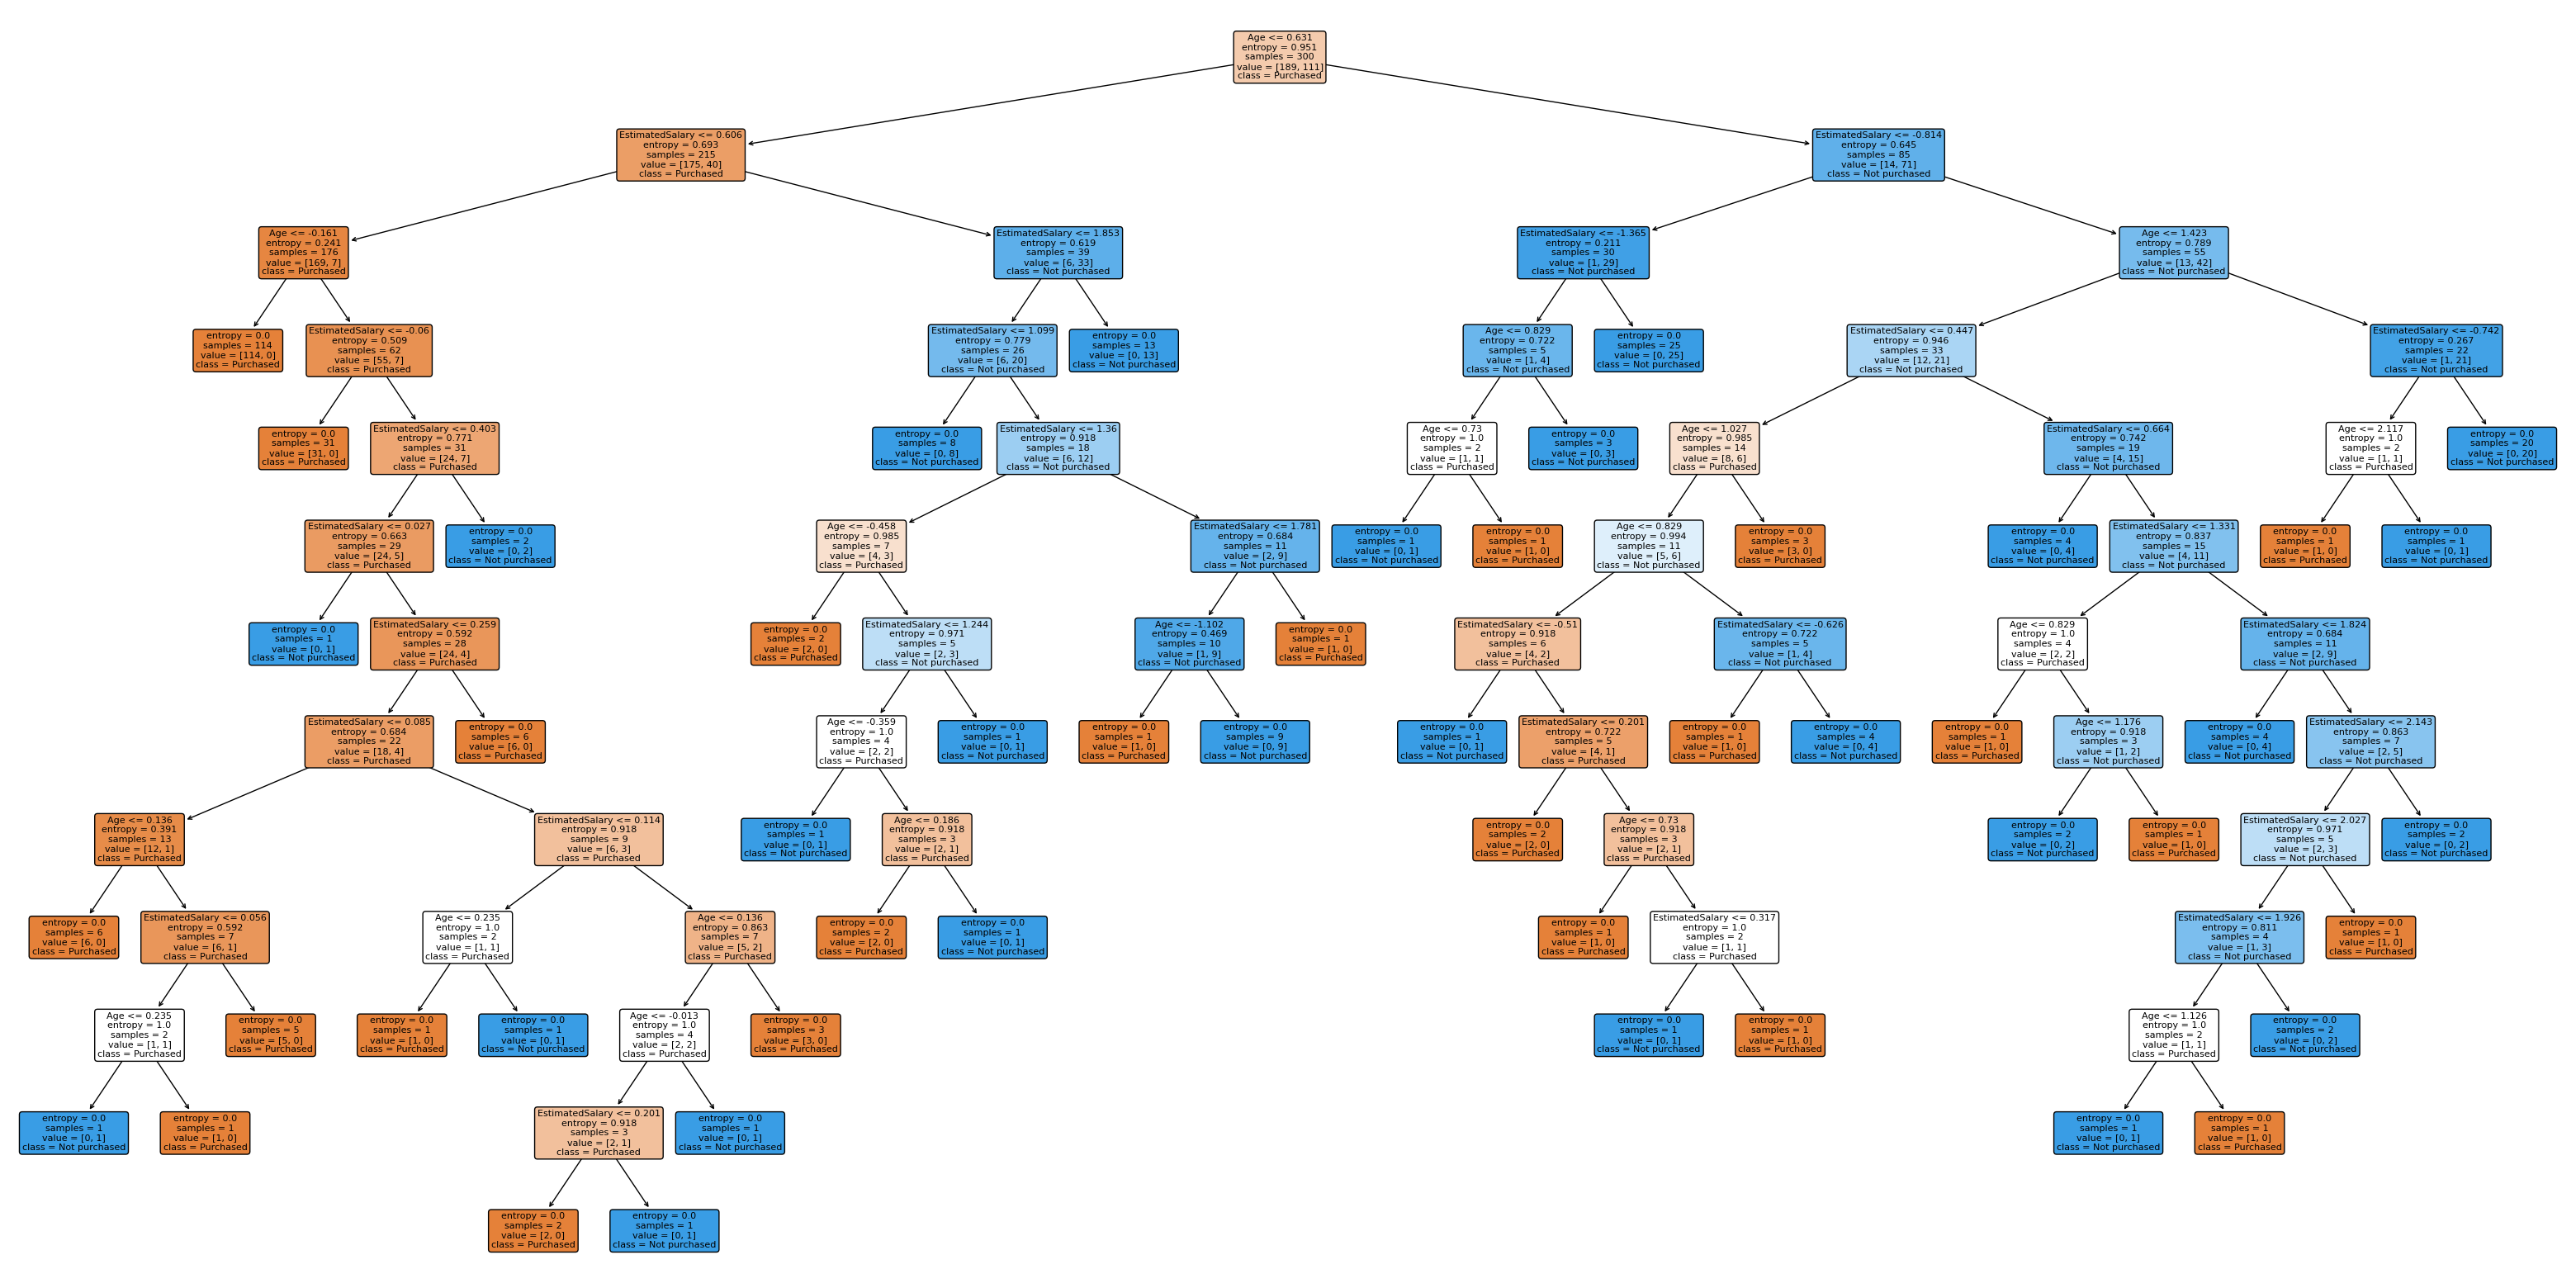

In [11]:

%matplotlib inline
from sklearn.tree import plot_tree 

fig, ax = plt.subplots(figsize=(40, 20))

plot_tree(classifier,
        feature_names=[ 'Age',  'EstimatedSalary'
        ],
        class_names=['Purchased', 'Not purchased'],
        filled=True,
        rounded=True)

plt.show()

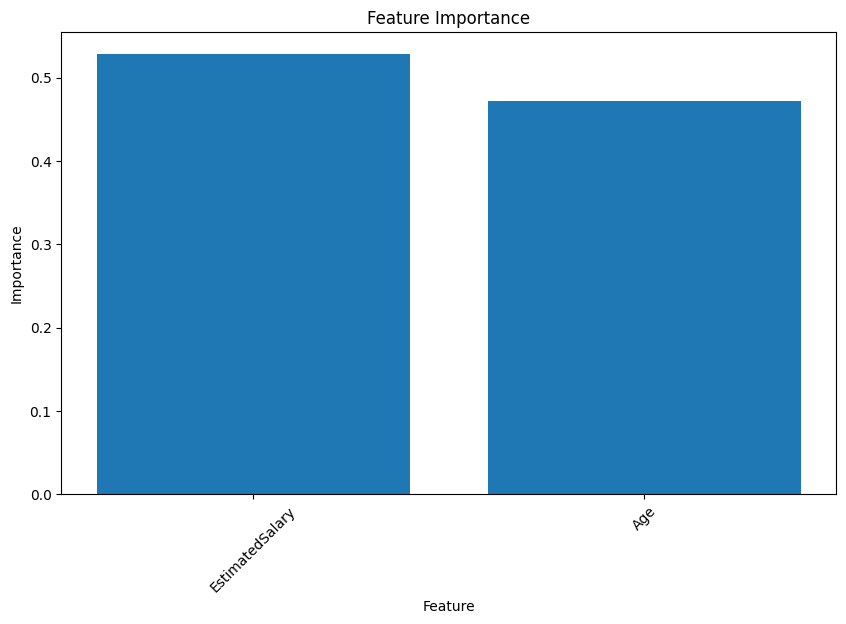

In [17]:
# Get feature importances
importances = classifier.feature_importances_

# Get feature names
feature_names = df_user.columns[2:4]  # Assuming Age and EstimatedSalary are the features

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
names = [feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


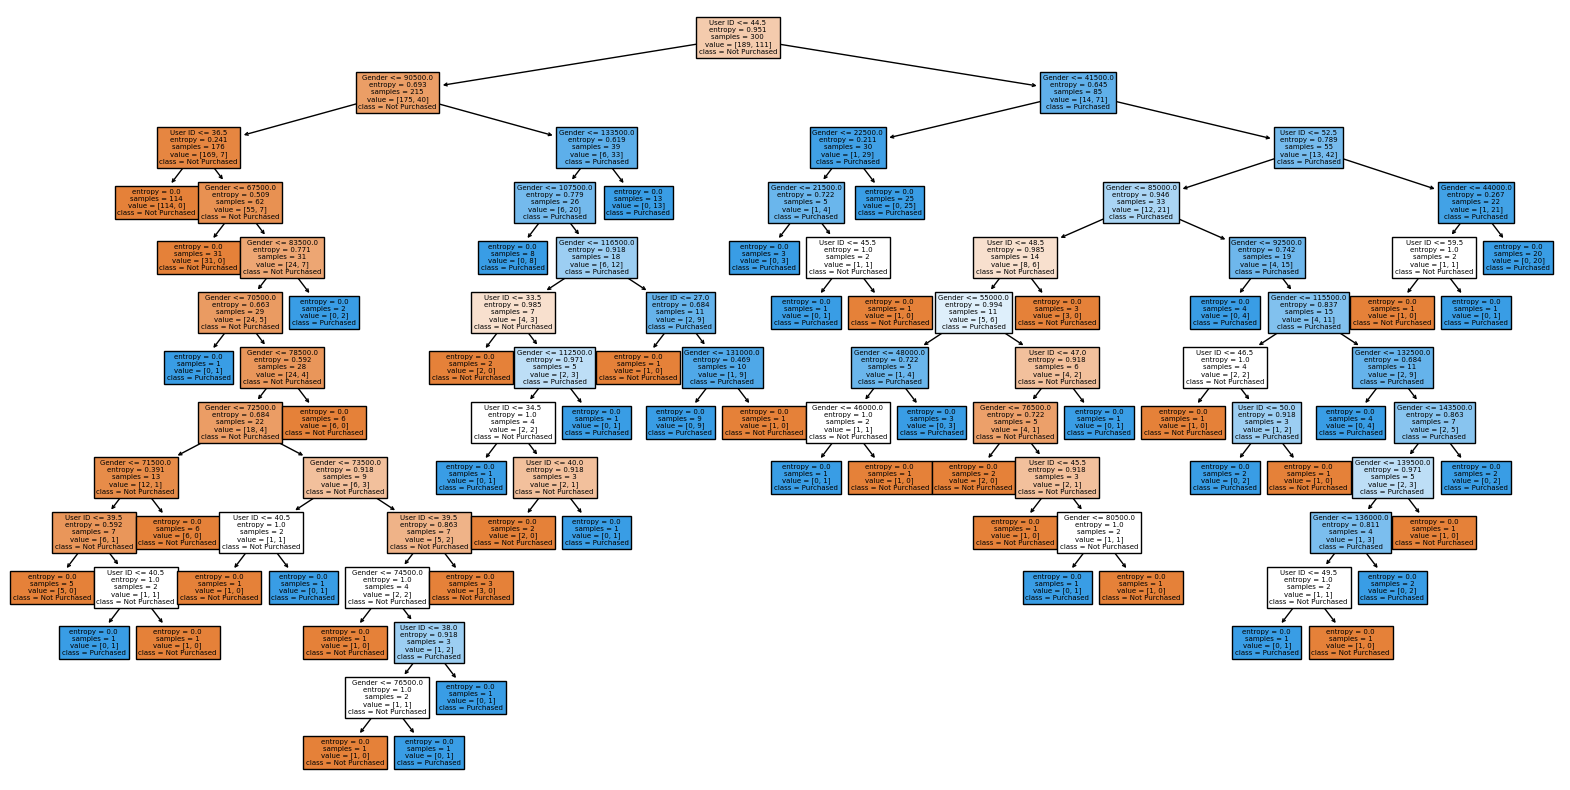

In [21]:
# Get feature importances
feature_importances = classifier.feature_importances_

# Find indices of top k features (e.g., top 2)
k = 2
top_indices = np.argsort(feature_importances)[::-1][:k]

# Select only the important features
X_selected = X[:, top_indices]

# Splitting the selected dataset into the Training set and Test set  
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size = 0.25, random_state = 0)

# Fit Decision Tree classifier to the training set using only important features
classifier_selected = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_selected.fit(X_train_selected, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(classifier_selected, filled=True, feature_names=df_user.columns[top_indices], class_names=["Not Purchased", "Purchased"])
plt.show()


In the above code, we have created a classifier object, in which we have passed two main parameters;

- `criterion='entropy'`: Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.
- `random_state=0"`: For generating the random states.

In [6]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [7]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

C:\Users\hp\AppData\Local\Temp\ipykernel_17520\2446874572.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
C:\Users\hp\AppData\Local\Temp\ipykernel_17520\2446874572.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


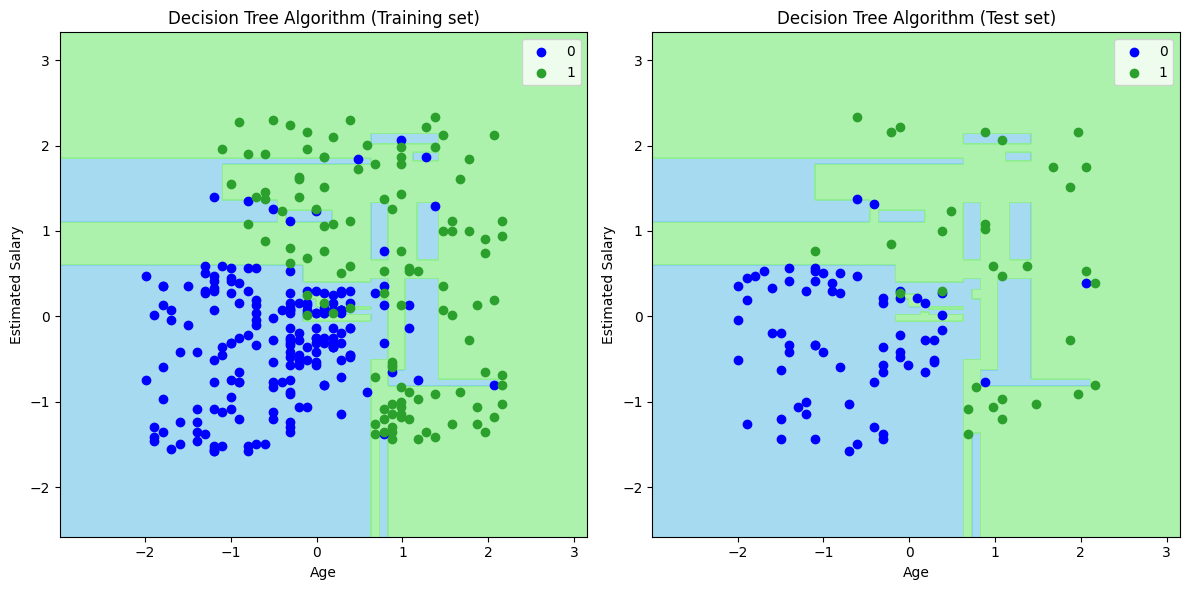

In [22]:
# Importing libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set up the figure with two subplots in one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visulaizing the training set result
x_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
axes[0].contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(['#87CEEB', '#90EE90']))
axes[0].set_xlim(X1.min(), X1.max())
axes[0].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[0].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c=ListedColormap(['#0000FF', '#2ca02c'])(i), label=j)

axes[0].set_title('Decision Tree Algorithm (Training set)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Estimated Salary')
axes[0].legend()

# Visulaizing the test set result
x_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
axes[1].contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(['#87CEEB', '#90EE90']))
axes[1].set_xlim(X1.min(), X1.max())
axes[1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    axes[1].scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c=ListedColormap(['#0000FF', '#2ca02c'])(i), label=j)

axes[1].set_title('Decision Tree Algorithm (Test set)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Estimated Salary')
axes[1].legend()

plt.tight_layout()
plt.show()


As we can see in the above image that there are some green data points within the purple region and vice versa. So, these are the incorrect predictions which we have discussed in the confusion matrix.

# Titanic dataset

In [2]:
import pandas as pd

df = pd.read_csv('titanic.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# checnging the categorical values for Sex to 0 or 1.
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [4]:
# we dont need the Cabin column  in our case
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [7]:
df.Sex.unique()

array([0, 1], dtype=int64)

In [8]:
# droping the NaN values
df.dropna(inplace=True)

In [9]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
# creating a dataframe with the dummy indices for the categorical variable

df = pd.get_dummies(df, columns=['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,True,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,False,True


-  (b). Separate the data into a feats DataFrame containing the explanatory variables and target containing the Survived variable.

In [11]:
feats = df.drop('Survived', axis=1)

target = df['Survived']

- (c). Create the training set and the test set with a 75/25 split. Display the length of each object.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feats,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=42)

# The random_state parameter is used to set the distribution between the training and test sets

print(len(X_train), len(y_train), len(X_test), len(y_test))


534 534 178 178


In [13]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
703,704,3,0,25.0,0,0,7.7417,False,True,False
462,463,1,0,47.0,0,0,38.5000,False,False,True
858,859,3,1,24.0,0,3,19.2583,True,False,False
429,430,3,0,32.0,0,0,8.0500,False,False,True
811,812,3,0,39.0,0,0,24.1500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
93,94,3,0,26.0,1,2,20.5750,False,False,True
135,136,2,0,23.0,0,0,15.0458,True,False,False
338,339,3,0,45.0,0,0,8.0500,False,False,True
549,550,2,0,8.0,1,1,36.7500,False,False,True


- We can now instantiate our classifier `DecisionTreeClassifier` from the sub-module `sklearn.tree`.

    `from sklearn.tree import DecisionTreeClassifier`

    `model = DecisionTreeClassifier()`

- We choose to specify the depth of the tree: here it is equal to 3 for the readability of the tree.

    `from sklearn.tree import DecisionTreeClassifier`

    `model = DecisionTreeClassifier(max_depth = 3)`

- The model is trained on the training set using the fit method :

    `model.fit(X_train, y_train)`

- The next step will be to perform the predictions on the test set to evaluate our model.

In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 3, random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [15]:
# the score of our model on the training set and on the test set.
print('Score on train set', model.score(X_train, y_train))

print('Score on test set', model.score(X_test, y_test))

Score on train set 0.8370786516853933
Score on test set 0.7528089887640449


The analysis of the score on the training set and on the test set allows to identify the overfitting. Indeed, the score on the training test is higher than the test score. To overcome this problem we will add another parameter: `min_samples_leaf`. This parameter indicates the minimum number of samples required for a node separation. So, if there are not enough samples, the node will be a leaf (a final node). The parameters `max_depth` and `min_samples_leaf` are two essential parameters to avoid overfitting.

In [16]:
# so instantiating a second model and train it on the training set.
from sklearn.tree import DecisionTreeClassifier

model_min_samples = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 25, random_state=42)

model_min_samples.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=25, random_state=42)

In [17]:
# so now model score are
print('Score on train set', model_min_samples.score(X_train, y_train))

print('Score on test set', model_min_samples.score(X_test, y_test))

Score on train set 0.8258426966292135
Score on test set 0.7471910112359551


Although the score on the training set has slightly decreased, we notice that the gap between the score on the training set and the score on the test set is reduced. We therefore decide to continue with this model which generalizes better on the data it does not know.

In the other modesl such as Bayes-Naive and the Binary Logistic regression, we learned that the default score for classification models was accuracy. So this is the score obtained here. Many other metrics exist to study the performance of these models. 

**The interpretation of the model:**
One of the strong points of decision trees is the simplicity of interpreting how they work. In the same way that we analyzed our regression tree, we can analyze our classification tree. With this study, we want to know which variables are the most important for the model and which thresholds it uses to make its predictions.

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,True,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,False,True


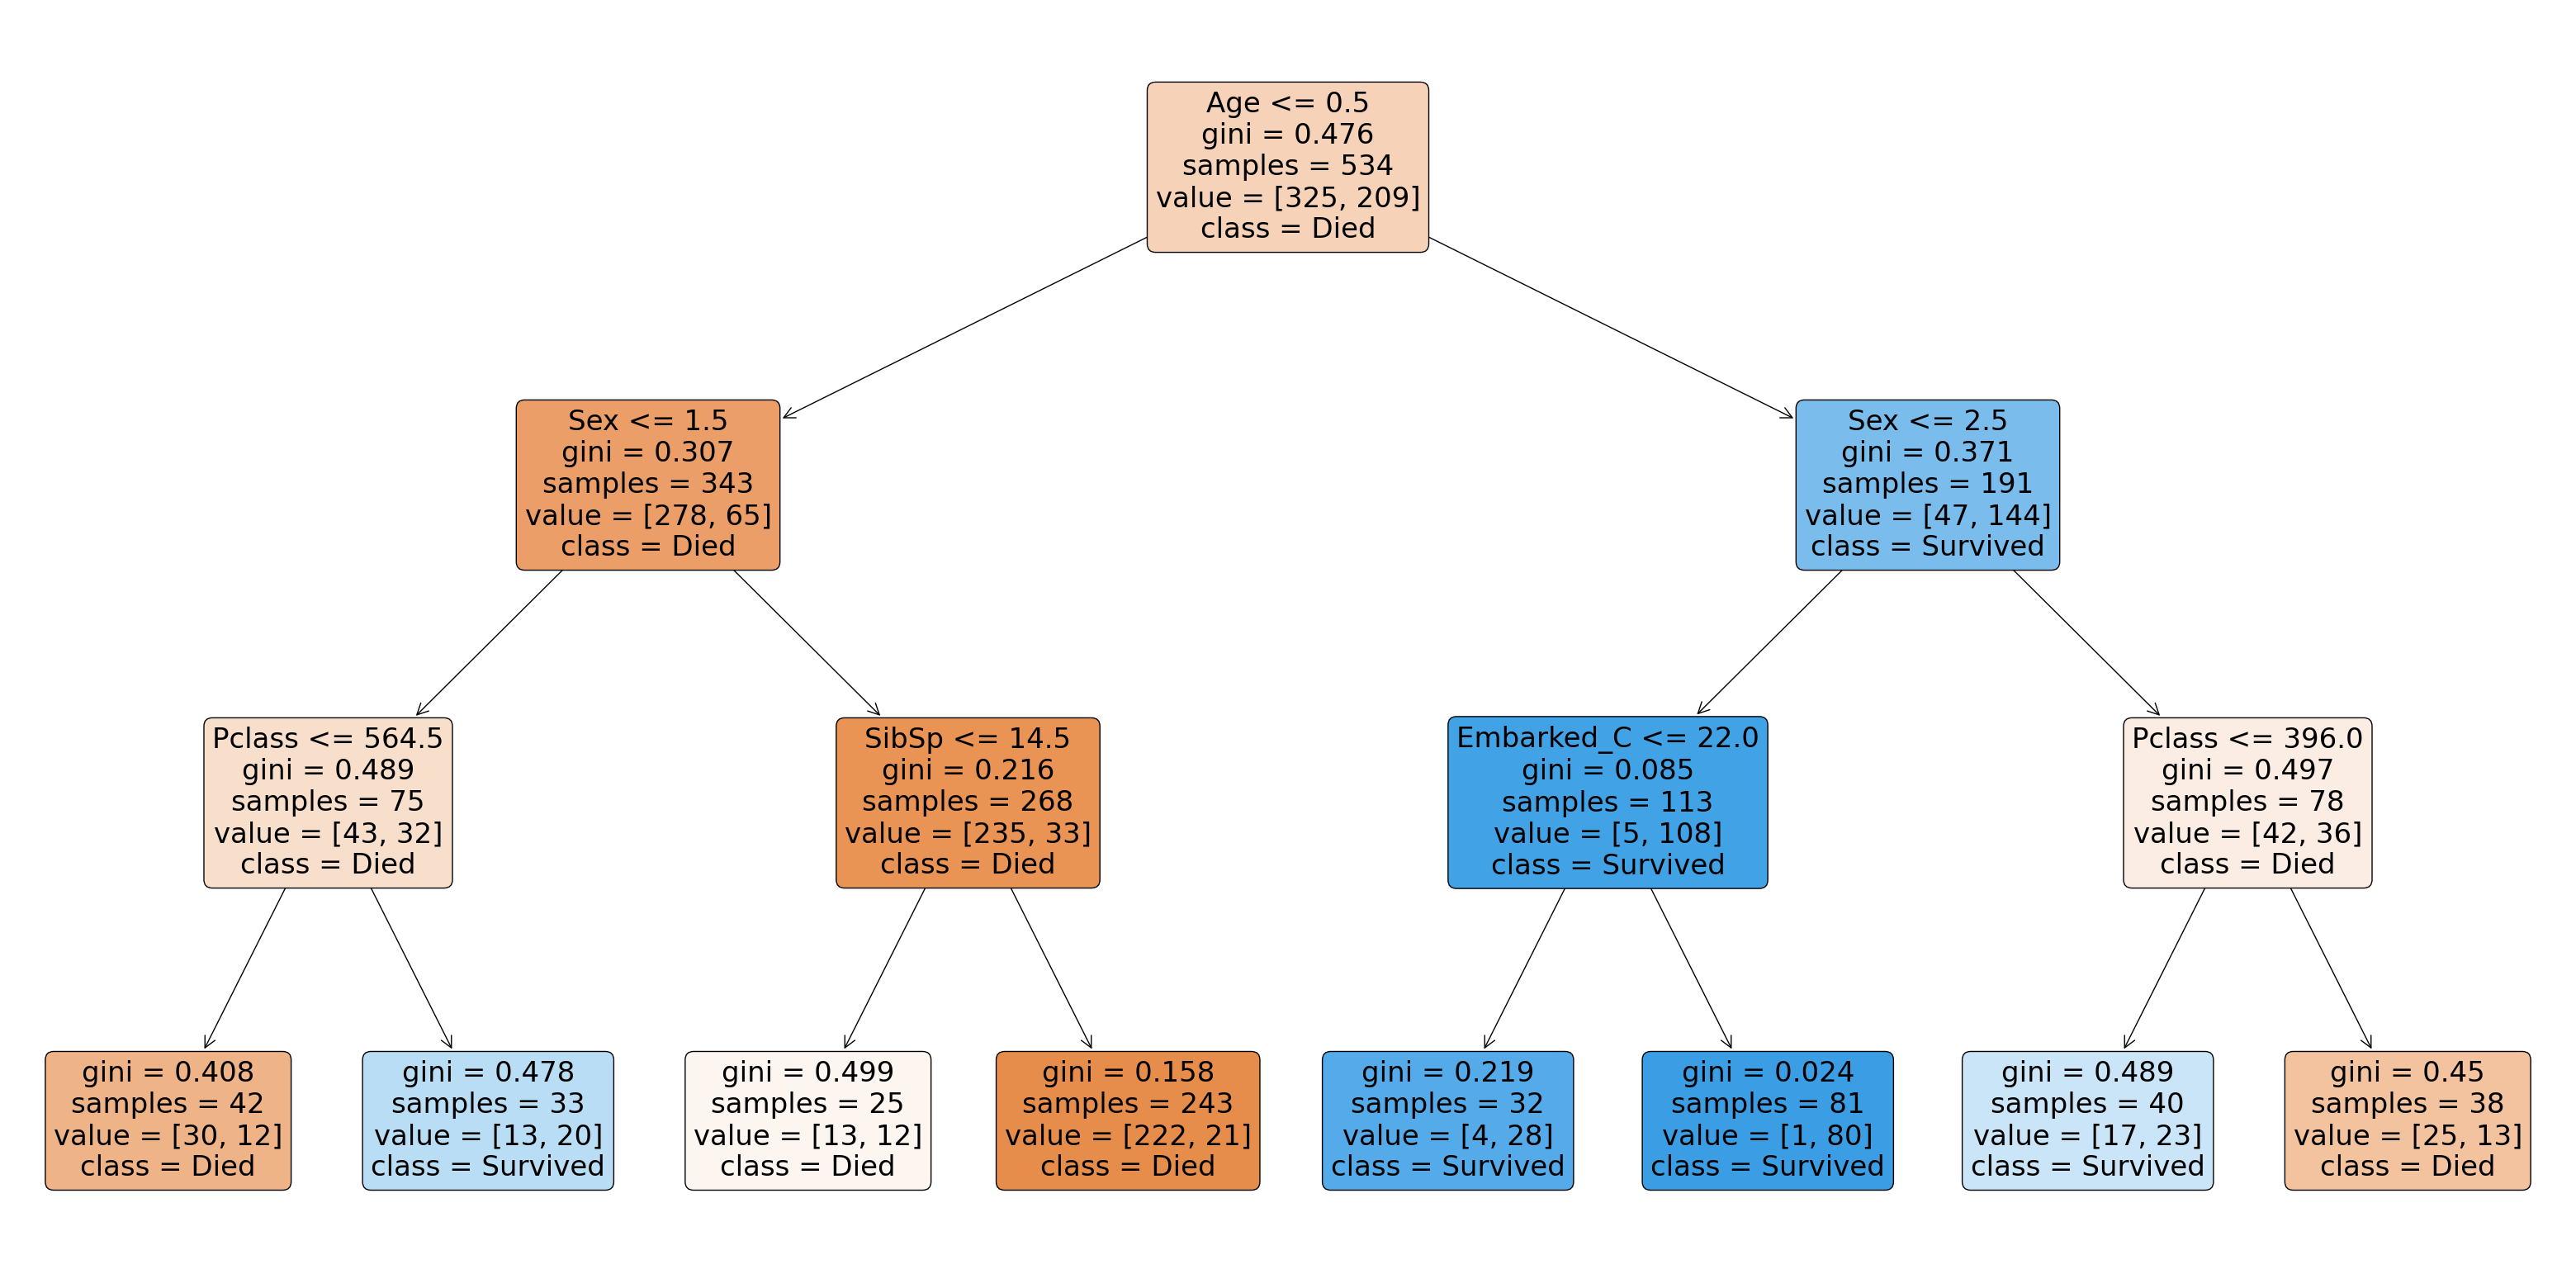

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(40, 20))

plot_tree(model_min_samples,
        feature_names=[
            'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
            'Embarked_Q', 'Embarked_S'
        ],
        class_names=['Died', 'Survived'],
        filled=True,
        rounded=True)

plt.show()


1. The root node, the node at the top of the tree, contains all the samples of the training set, there are 534 samples: `samples=534.`

    The first test that will be performed corresponds to Sex < = 0.5. As a reminder, Sex is a binary variable, it is equal to 0 when the individual is a man, 1 when it is a woman. We then look at the value for each sample. All the samples for which the variable Sex is 0, go in the left child node, if not in the right child node. More simply, all men go in the left child node, all women in the right child node.

   The parameter value indicates the distribution of classes in y_train before any separation. We have initially 325 individuals who are dead and 209 who are alive. The class parameter indicates which is the majority class. Here it is the class 0 "Died": class = Died.

   Finally, for a classification problem, the error is calculated using the Gini criterion. This criterion is between 0 and 0.5. The higher this criterion is, the more heterogeneous the node is and the lower the criterion is, the more homogeneous it is. A node is homogeneous when it contains only samples of one class, the Gini criterion is equal in this case to 0.

   The objective of our model is to separate our classes as well as possible, so we want to end up with nodes as homogeneous as possible. Finally, the more homogeneous a leaf will be, with a low Gini criterion, the better the model will perform.

2. We remind that the child nodes are the intermediate nodes of the tree. In the first left child node, we retrieve all the male individuals. There are 343 males in the training set (samples=343). The application of the condition described in the root node, allows us to reduce the Gini score by almost 0.169, we go from 0.476 to 0.307. The application of this condition has increased the homogeneity of the node. In this child node, there are more people who died than survived (278 > 65). The majority class is Died.

3. The separations follow until the leaves, the terminal nodes, are obtained. The predicted class for the samples belonging to the leaf is the majority class. The color code is as follows: Orange when the majority class is class 0, Blue when it is class 1. The intensity of the color depends on the value of the Gini criterion, the lower it is the more intense the colors are. For the leftmost leaf, we have a Gini criterion equal to 0.5. There are 50 samples and the distribution is 25 samples belonging to class 0 and 25 samples to class 1. The node is therefore perfectly heterogeneous. This means that the model is wrong for 25 individuals, i.e. 50% of the samples of this sheet.

Finally, the variables that enabled the classification of the samples, ranked in order, are `Sex`, `Pclass`, `Age` and `Fare`. The higher a variable is placed in the tree, the more important it played a role in the classification.

But how to quantify the role of each variable?

Instead of displaying the tree, or in addition to this analysis, it is possible to study the "feature importances" of the model. This attribute of the model class, called `feature_importances_`, allows to classify the variables according to the role they played in the prediction choices of the model. The sum of these values is 1.

The importance of a variable is calculated from the decrease in node impurity weighted by the probability of reaching the node. And the probability of reaching the node is obtained by dividing the number of samples reaching the node by the total number of samples.

Finally, the higher the importance value, the more important the variable.

In [20]:
feat_importances = pd.DataFrame({ 
                                "Variables": feats.columns, 
                                "Importance": model_min_samples.feature_importances_ 
                                }).sort_values(by='Importance', ascending=False)

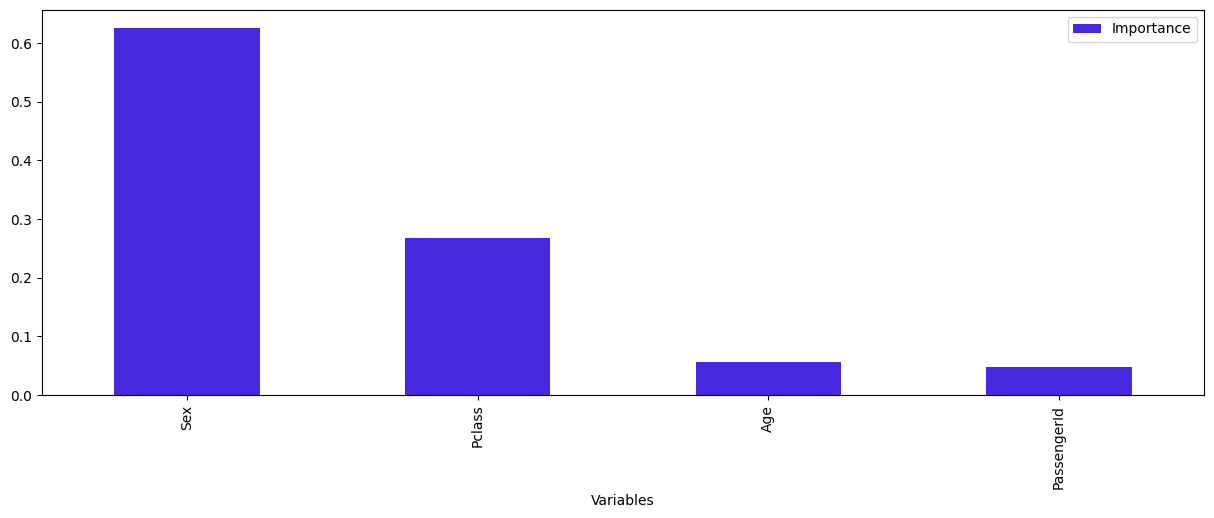

In [21]:
feat_importances.nlargest(4, "Importance").plot.bar(x="Variables",
                                                    y="Importance",
                                                    figsize=(15, 5),
                                                    color="#4529de");

From these elements, we are able to decide on the accuracy of the expression "women and children first" (within the context of the data we have at our disposal). The women are indeed among the people who survived most after the disaster. The Sex variable is the most important one in the model. Nevertheless, even if age is among the three most important variables in the tree, a more precise analysis of the tree does not allow us to validate this assertion.

# Example-2 : Binary Logistic Regression

### Churn.csv

In this example, we work in a company that wants to predict the churn of their customers' contracts based on data. We are therefore in a binary classification case (churn or not churn). Note that there are also problems of classification called multi-class, i.e. when the target variable takes more than two modalities.

This analysis is important for a company because it enables to identify customers who are likely to leave. We can then offer them new specialized deals in order to keep them engaged and avoid their departure. The dataset we will use is called churn.csv.


**Here is the data description:**


| Variables' name |                   Description                                | 
|-----------------|--------------------------------------------------------------|
| customerID      |  Customer ID                                                 | 
| gender          | Whether the customer is a male or a female (Male, Female)    |
| SeniorCitizen   | Whether the customer is a senior citizen or not (1, 0)       |
| Partner         | Whether the customer has a partner or not (Yes, No)          |
| Dependents      | Whether the customer has dependents or not (Yes, No)         |
| tenure          | Number of months the customer has stayed with the company    |
| PhoneService    | Whether the customer has a phone service or not (Yes, No)    |
| PaperlessBilling| Whether the customer asked for paperless billing lines or not (Yes, No) |
| MonthlyCharges  | Bill amount per month                                        |
| TotalCharges    | Total bill amount                                            |
| Churn           | Target variable : whether the customer churned or not (Yes, No) |

In [143]:
%pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ------ -------------------------------- 41.0/257.7 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------  256.0/257.7 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# we dont need the Cabin column  in our case
df.drop(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], axis=1, inplace=True)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes


In [6]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [8]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

The column 'CustomerId' is irrelevant for our case: they are IDs related to customers, we can therefore delete it.

In [13]:
df = df.drop(['customerID'], axis=1)

In [14]:
df.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values

In [15]:
display(df['Partner'].value_counts()) 

display(df['Dependents'].value_counts()) 

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [16]:
feats = df.drop('Churn', axis=1)
target = df['Churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)

In [18]:
X_train.MonthlyCharges.isna().sum()

0

In [19]:
y_train

6607    Yes
2598     No
2345     No
4093     No
693     Yes
       ... 
3772    Yes
5191     No
5226     No
5390    Yes
860      No
Name: Churn, Length: 5282, dtype: object

In [20]:
from sklearn.impute import SimpleImputer

# Define imputer with 'most_frequent' strategy
imputer = SimpleImputer(missing_values=' ', strategy='most_frequent')

# Apply imputation to the specified columns
X_train[['MonthlyCharges', 'TotalCharges']] = imputer.fit_transform(X_train[['MonthlyCharges', 'TotalCharges']])
X_test[['MonthlyCharges', 'TotalCharges']] = imputer.transform(X_test[['MonthlyCharges', 'TotalCharges']])


- Standardize the numerical variables ('tenure', 'MonthlyCharges', 'TotalCharges') using StandardScaler by estimating the parameters on the training set and applying it to the training and test set.

In [21]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

In [22]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
6607,Male,0,No,Yes,-1.282882,No,Yes,-1.310046,-0.997092
2598,Female,0,No,No,-1.037857,Yes,Yes,0.344832,-0.776818
2345,Female,0,No,Yes,-1.160369,Yes,Yes,-1.484331,-0.970555
4093,Female,0,No,No,-0.139429,Yes,Yes,0.373049,-0.031734
693,Female,0,No,No,-1.201207,Yes,Yes,0.343172,-0.888917
...,...,...,...,...,...,...,...,...,...
3772,Male,0,Yes,No,-1.282882,Yes,Yes,1.003795,-0.966367
5191,Female,0,Yes,Yes,-0.384455,Yes,Yes,0.874326,-0.039206
5226,Male,0,Yes,Yes,-0.833669,Yes,Yes,-1.447814,-0.873334
5390,Male,1,No,No,-0.833669,Yes,Yes,1.151522,-0.479203


- Some of our data is textual. They cannot be processed by our algorithms. Indeed, since the models are based on mathematical calculations, we need all our data to be numerical: we will therefore encode our categorical variables.

Encode modalities of the target variable Churn using a LabelEncoder by estimating the encoding on the training set and applying it to the training and test set.

In [23]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_test = le.transform(y_test)

In [24]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

Encode the modalities of the explanatory variables gender, Partner, Dependents, PhoneService, PaperlessBilling using a OneHotEncoder. Learn and transform the training set, then apply the transformaiton to the test set.

In [25]:
oneh = OneHotEncoder(drop = 'first', sparse=False)

cat = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

X_train[cat] = oneh.fit_transform(X_train[cat])

X_test[cat] = oneh.transform(X_test[cat])

Our data are ready, we can now proceed to the modeling part. For each of the models we are going to implement, we are going to evaluate them thanks to the confusion matrix and the usual metrics: the score, the recall, the precision and the f1-score.

1. **Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog.fit(X_train, y_train)

print('Score on the train set', reglog.score(X_train, y_train))
print('Score on the test set', reglog.score(X_test, y_test))

Score on the train set 0.7930708065126846
Score on the test set 0.8029528676888131


In [27]:
# classification_report
from sklearn.metrics import classification_report

y_pred = reglog.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Prediction']))

print(classification_report(y_test, y_pred, ))

Prediction,0,1
True,,
0,1175,107
1,240,239


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1282
           1       0.69      0.50      0.58       479

    accuracy                           0.80      1761
   macro avg       0.76      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761



2. **DecisionTreeClassifier**

In [28]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Score on the train set ', clf.score(X_train, y_train))
print('Score on the test set', clf.score(X_test, y_test))

Score on the train set  0.9971601666035592
Score on the test set 0.7126632595116411


In [29]:
# classification_report
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

display(pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))

Prediction,0,1
True,,
0,1021,261
1,245,234


              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1282
           1       0.47      0.49      0.48       479

    accuracy                           0.71      1761
   macro avg       0.64      0.64      0.64      1761
weighted avg       0.72      0.71      0.71      1761



Decision trees allow us to make separations based on the different variables by minimizing a function that we have chosen before. Thanks to these different splits, it is possible to determine the importance of each variable, i.e. the level of impact on the decision linked to this variable only. These importance can be found thanks to the attribute `feature_importances_` of our decision tree.

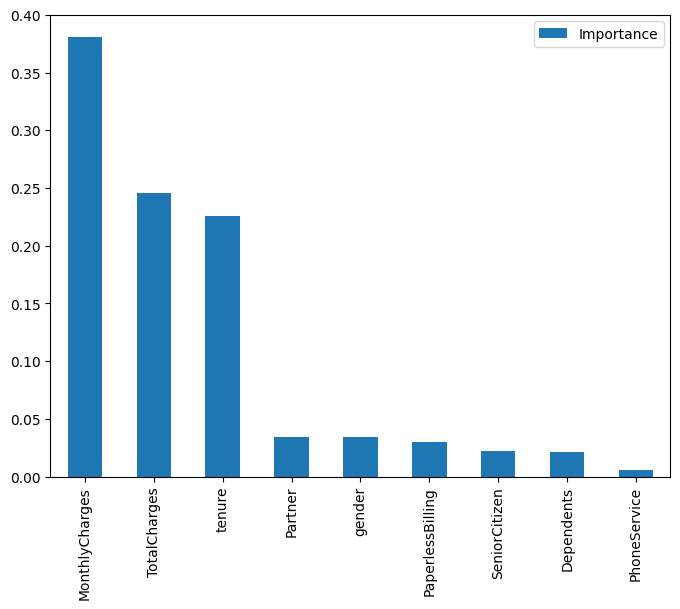

In [30]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(clf.feature_importances_, index=feats.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.show()


The variables `MonthlyCharges`, `TotalCharges` and `tenure` are the most important variables for the classification of the decision tree. We can use these importances to try to reduce the size of our dataset and to interpret our model. The variables that are most important for the decision of the algorithm are: `MonthlyCharges` and `TotalCharges`.

In [31]:
X_train_new = X_train[['MonthlyCharges','TotalCharges','tenure','gender']]
X_test_new = X_test[['MonthlyCharges','TotalCharges','tenure','gender']]

clf = tree.DecisionTreeClassifier(random_state=42) 
  
clf.fit(X_train_new, y_train)

print(clf.score(X_train_new,y_train))
print(clf.score(X_test_new,y_test))

0.9918591442635365
0.720045428733674


In [32]:
# classification_repor
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_new)

display(pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Prediction']))
print(classification_report(y_test, y_pred))

Prediction,0,1
True,,
0,1042,240
1,253,226


              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1282
           1       0.48      0.47      0.48       479

    accuracy                           0.72      1761
   macro avg       0.64      0.64      0.64      1761
weighted avg       0.72      0.72      0.72      1761



We can observe that we do not lose the performance of our model by removing a certain amount of data, the results can even be better. Reducing the dimension of our dataset can therefore be a crucial step in the development of our model.

We can now display the tree corresponding to the different separations with the reduced number of variables. We reinstantiate a model by choosing a maximum depth of the tree of 3 for visualization purposes.

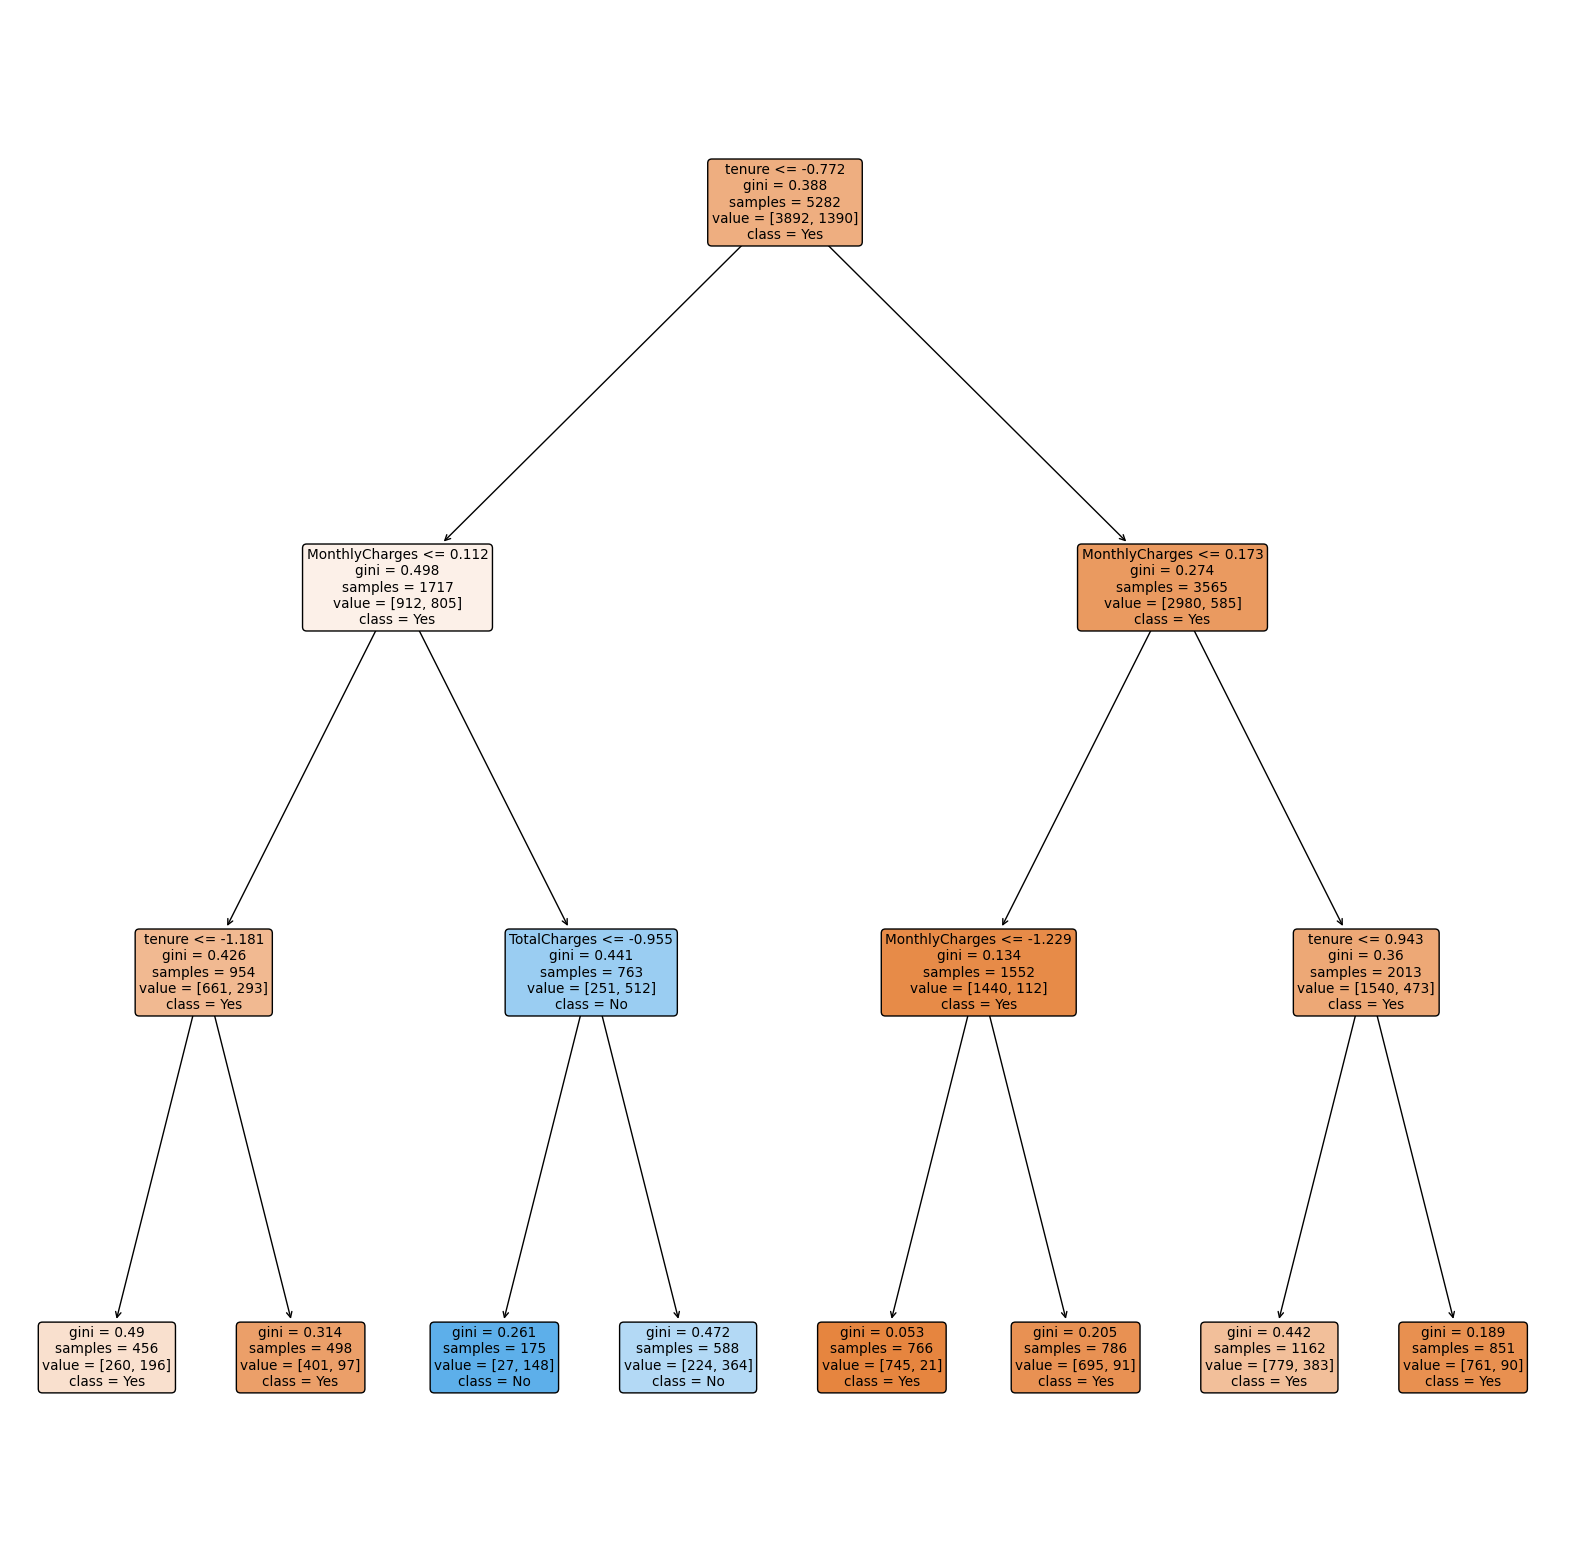

In [33]:
from sklearn.tree import plot_tree 

clf = tree.DecisionTreeClassifier(random_state=42,max_depth = 3) 

clf.fit(X_train_new, y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(clf, 
          feature_names = ['MonthlyCharges','TotalCharges','tenure','gender'],
          class_names = ['Yes','No'],
          filled = True, 
          rounded = True)

plt.show()

- We first look at the value of tenure, if it is less than -0.857, we go to the left of the tree. If it is not, we go to the right;
- If we are in the left subtree, we now look at the MonthlyCharges variable. If it is less than 0.045, we move to the left of the tree, otherwise we move to the right;
- We do the same with all the decision variables of each node we fall into until we arrive at a leaf, giving us the majority class and therefore the prediction.

We have displayed the tree with the normalized variables which makes it difficult to interpret: what does it mean in real life when MonthlyCharges < 0.045? To make it more interpretable, we display the decision tree with the unnormalized data just below.

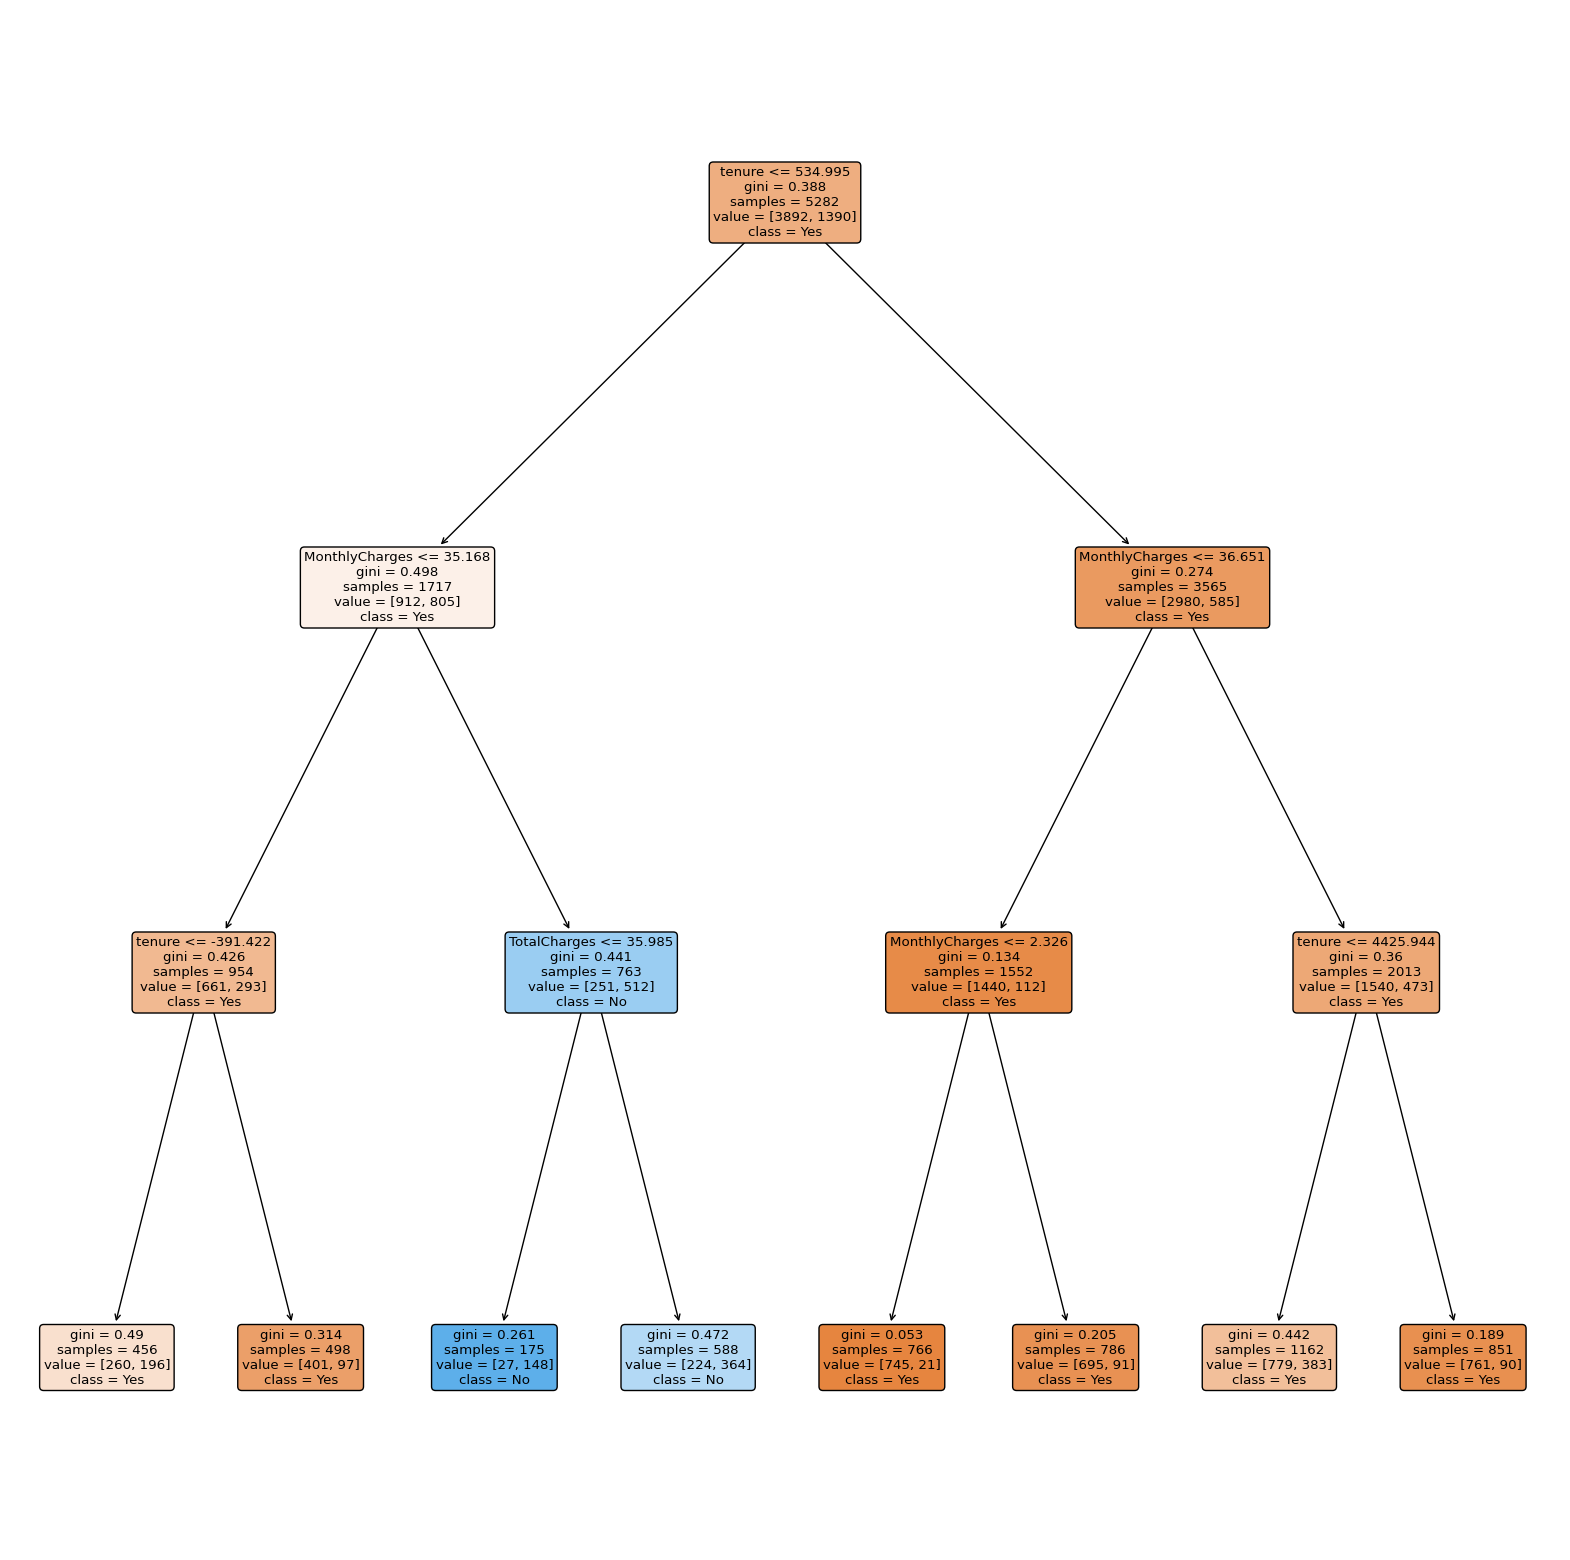

In [34]:
from sklearn.tree import plot_tree 

clf = tree.DecisionTreeClassifier(random_state=42,max_depth = 3) 
  
    
# We rescale the data for display 

X_train_new_unscaled = sc.inverse_transform(X_train_new[['MonthlyCharges','TotalCharges','tenure']])


clf.fit(X_train_new_unscaled, y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(clf, 
          feature_names = ['MonthlyCharges','TotalCharges','tenure','gender'],
          class_names = ['Yes','No'],
          filled = True, 
          rounded = True)

plt.show()

This is exactly the same logic as for the tree with normalized data :

- We first look at the value of tenure, if it is less than 804, we go to the left of the tree. If it is not, we go to the right ;
- If we are in the left subtree, we now look at the MonthlyCharges variable. If it is less than 33.7, we move to the left of the tree, otherwise we move to the right ;
- We do the same with all the decision variables of each node we fall into until we arrive at a leaf, giving us the majority class and therefore the prediction.

3. **Random Forest:**

In [35]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Score on the train set', rf.score(X_train, y_train))
print('Score on the train set', rf.score(X_test, y_test))

Score on the train set 0.9969708443771299
Score on the train set 0.778534923339012


In [36]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

print(pd.crosstab(y_test,y_pred))
print(classification_report(y_test, y_pred))

col_0     0    1
row_0           
0      1150  132
1       258  221
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1282
           1       0.63      0.46      0.53       479

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.69      1761
weighted avg       0.76      0.78      0.77      1761



**A word about class imbalance**

(a) Display the percentage distribution of the target variable.

In [ ]:

target.value_counts(normalize=True)

In our customer base, 26.5% of the customers present have ended their contract, which means that a naive model that predicts that all customers stay, would have an accuracy score of 73.4%. So the structure of our dataset already presents a limitation and a potential training bias by its imbalance. A good way to deal with this is to perform resampling on data. This means that we randomly add data to the under represented class (oversampling) or remove data from the overrepresented class (undersampling). The imblearn library allows to do these manipulations.

In [37]:
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
print('Oversampled sample classes :', dict(pd.Series(y_ro).value_counts(normalize = True)))

Oversampled sample classes : {1: 0.5, 0: 0.5}


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_ro, y_ro)

print('Score on train set', rf.score(X_ro, y_ro))
print('Score on test set', rf.score(X_test, y_test))

from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)


print(pd.crosstab(y_test,y_pred))
print(classification_report(y_test, y_pred))

Score on train set 0.9976875642343268
Score on test set 0.7614991482112436
col_0     0    1
row_0           
0      1081  201
1       219  260
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1282
           1       0.56      0.54      0.55       479

    accuracy                           0.76      1761
   macro avg       0.70      0.69      0.70      1761
weighted avg       0.76      0.76      0.76      1761



It is observed that the resampling made it possible to slightly increase the precision, the recall and the f1-score for class 1. Although in our case the improvement is not significant, we can say that a rebalancing may actually yield better results on the underrepresented class.

Starting with a business problem, we modeled it and trained classification algorithms to solve it.

We have thus created an algorithm able to predict the churn of a company's customer contracts. Thanks to this, the company will be able to target the customers likely to leave and take action to avoid a potential churn.

The RandomForest gives the best results. To go further, we could try to optimize the parameters of each of the models in order to have the best possible score while trying to reduce overfitting.



In [39]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Pipeline for processing numerical values 

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy="median")), 
           ("scaler", StandardScaler())]
)

# Processing of categorical variables 

categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

categorical_transformer = OneHotEncoder(drop = "first")


# Use ColumnTransformer to apply transformations on some columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Final pipeline

clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)

clf.fit(X_train, y_train)

print("Model Score: %.3f" % clf.score(X_test, y_test))

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: ' '

# Logistic regression

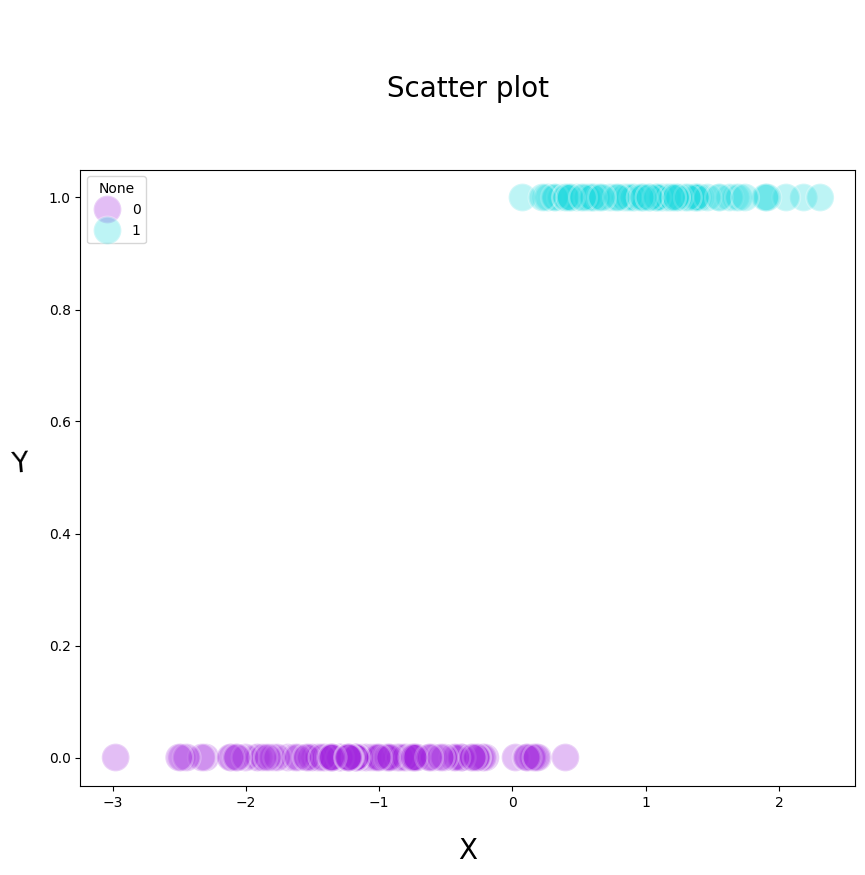

In [134]:
import seaborn as sns

from sklearn.datasets import make_classification

%matplotlib inline

X, y = make_classification(n_samples=200,
                        n_features=1,
                        n_clusters_per_class=1,
                        n_informative=1,
                        n_repeated=0,
                        n_redundant=0,
                        shuffle=True,
                        random_state=42)

X = pd.DataFrame(X, columns=["X"])

y = pd.Series(y)

fig = plt.figure(figsize=(10, 8))

sns.scatterplot(data=X,
                x=X["X"],
                y=y,
                hue=y,
                s=400,
                alpha=0.3,
                palette=["#a329de", "#26dbe0"],
                legend='full')

plt.title("\n\n Scatter plot \n\n", fontsize=20)

plt.xlabel("X", labelpad=20, fontsize=20)

plt.ylabel("Y", rotation=365, labelpad=20, fontsize=20)

plt.show()



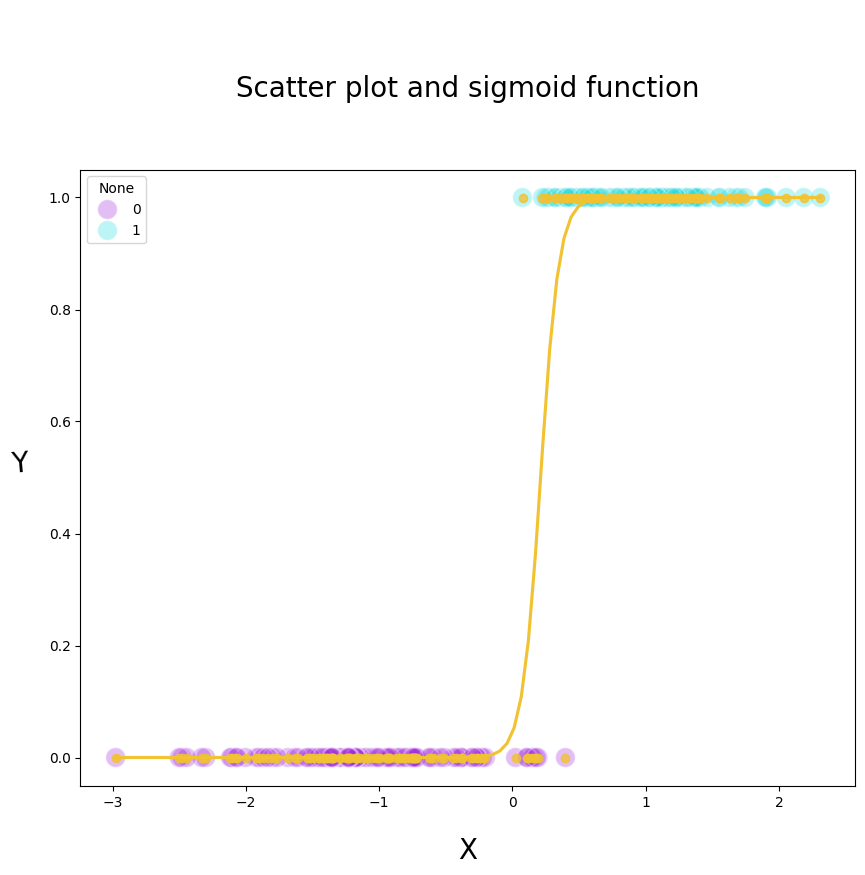

In [135]:
%matplotlib inline

fig = plt.figure(figsize=(10, 8))

sns.scatterplot(data=X,
                x=X["X"],
                y=y,
                hue=y,
                s=200,
                alpha=0.3,
                palette=["#a329de", "#26dbe0"],
                legend='full')

sns.regplot(data=X, x=X["X"], y=y, logistic=True, ci=None, color="#f1c232")

plt.xlabel("X", fontsize=20, labelpad=20)

plt.ylabel("Y", fontsize=20, rotation=365, labelpad=20)

plt.title("\n\n Scatter plot and sigmoid function \n\n", fontsize=20)

plt.show()



In [136]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# Insert your code

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

model = LogisticRegression()

model.fit(X_train,y_train)


LogisticRegression()

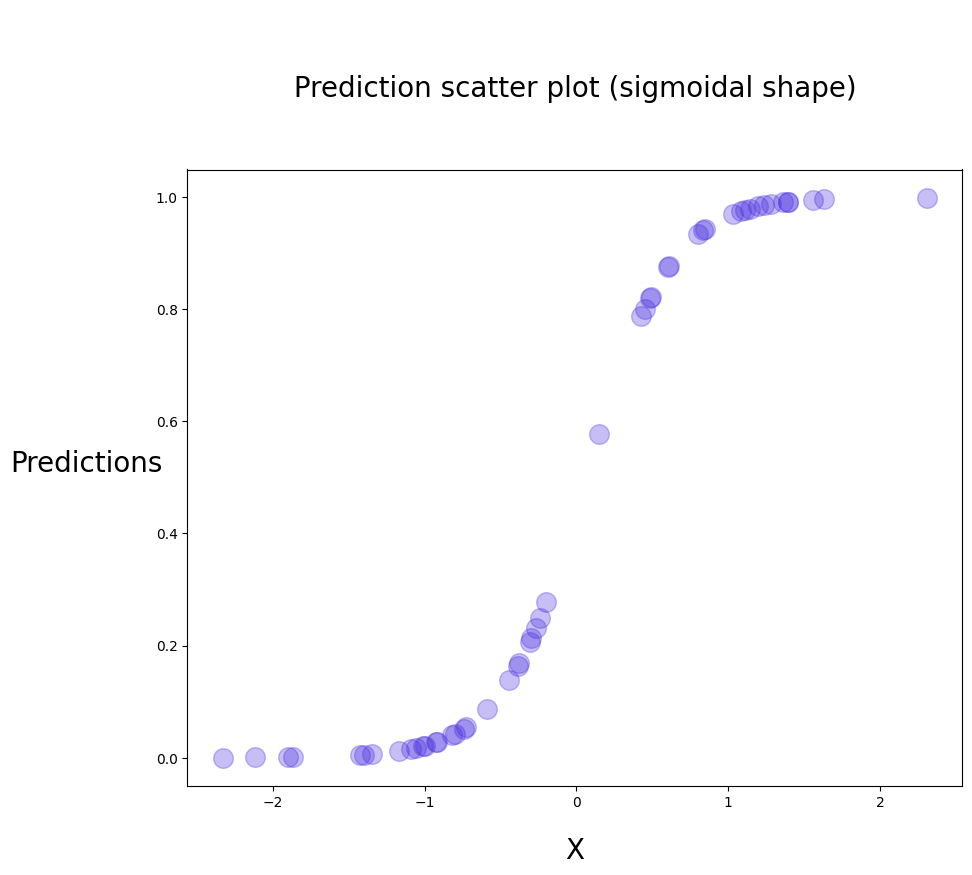

In [137]:
preds = model.predict(X_test)

#(2)

preds_proba = model.predict_proba(X_test)

# We keep only the probabilities of class 1

preds_proba = pd.DataFrame(preds_proba).iloc[:,1]

#(3)

plt.figure(figsize=(10, 8))

plt.scatter(X_test, preds_proba, color="#4529de", s=200,  alpha=0.3)

plt.xlabel("X", fontsize=20, labelpad=20)

plt.ylabel("Predictions", fontsize=20, labelpad=50, rotation=360)

plt.title("\n\n Prediction scatter plot (sigmoidal shape) \n\n", fontsize=20)

plt.show()

In [138]:
def score(y_test, preds):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

    return (accuracy_score(y_test, preds), precision_score(y_test, preds),
            recall_score(y_test, preds), confusion_matrix(y_test, preds))

score(y_test, preds)

(0.98,
 0.9565217391304348,
 1.0,
 array([[27,  1],
        [ 0, 22]], dtype=int64))

In [139]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.96      1.00      0.98        22

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [140]:
print(model.intercept_)

print(model.coef_[0])

[-0.22966554]
[3.6127951]


In [141]:
import numpy as np

np.exp(model.coef_[0])


array([37.06952118])